# Récupération des données propres

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st

df = pd.read_csv('datasetClean.csv')


# Analyse des données univariées

### Graphiques des données pour la variable région


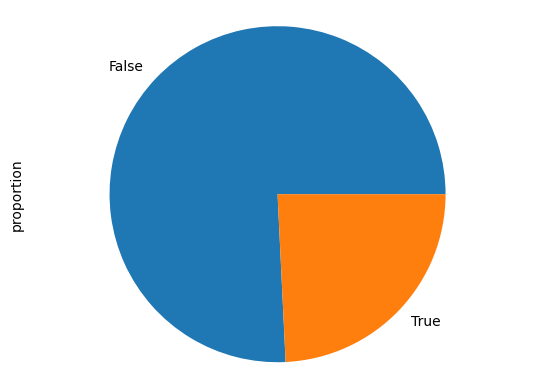

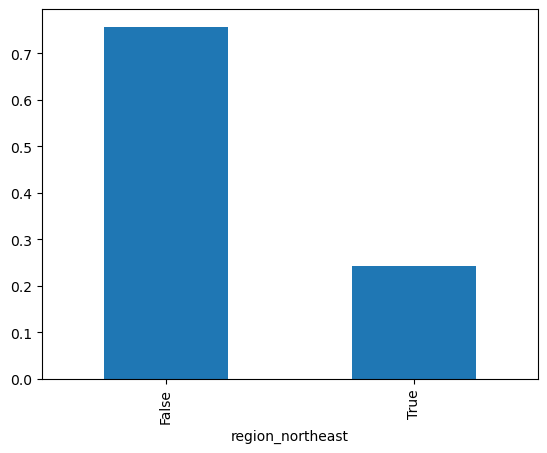

In [3]:
# Diagramme en secteurs
df["region_northeast"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
df["region_northeast"].value_counts(normalize=True).plot(kind='bar')
plt.show()

### Graphiques des données pour la variable age

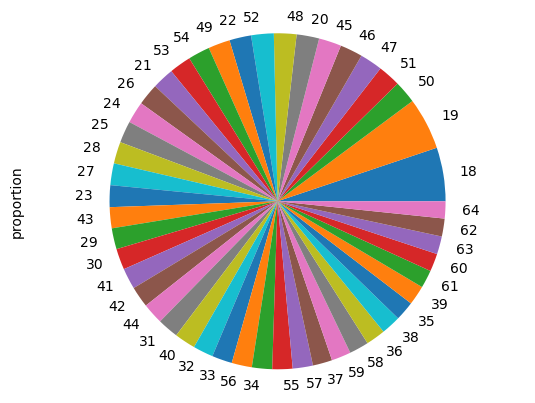

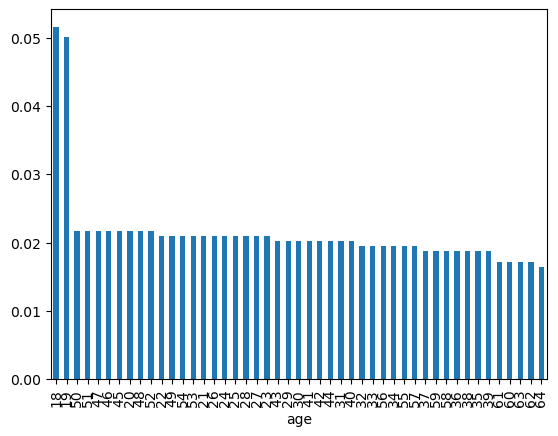

In [63]:
# Diagramme en secteurs
df["age"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
df["age"].value_counts(normalize=True).plot(kind='bar')
plt.show()

### Graphiques des données pour la variable fumeur

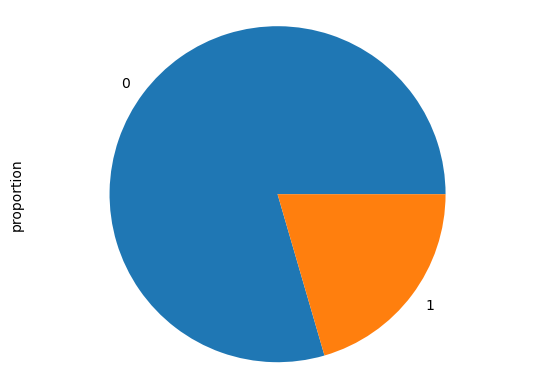

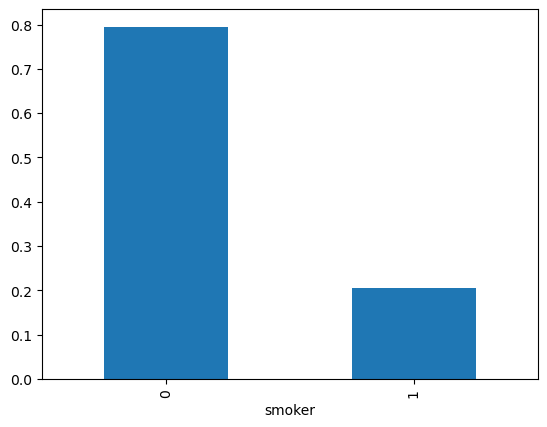

In [64]:
# Diagramme en secteurs
df["smoker"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
df["smoker"].value_counts(normalize=True).plot(kind='bar')
plt.show()

### Graphique des données pour la variable sexe

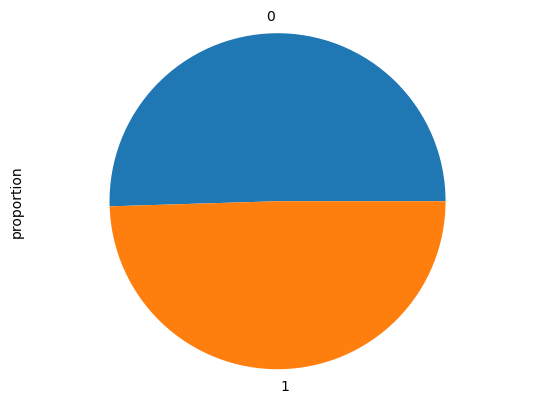

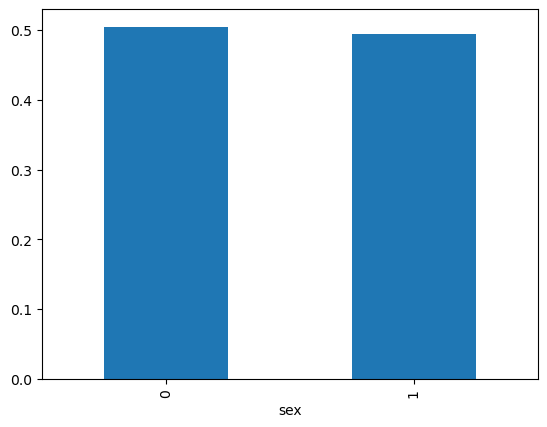

In [65]:
# Diagramme en secteurs
df["sex"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
df["sex"].value_counts(normalize=True).plot(kind='bar')
plt.show()

### Graphique des données pour la variable enfants

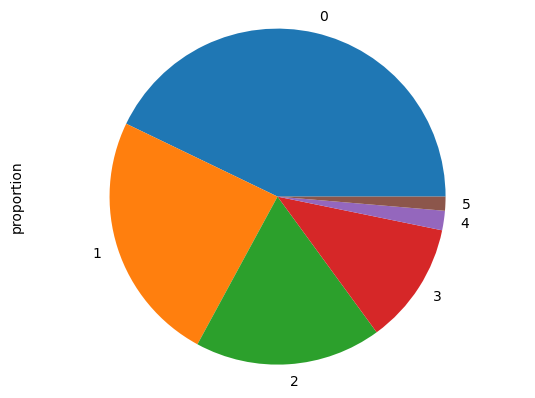

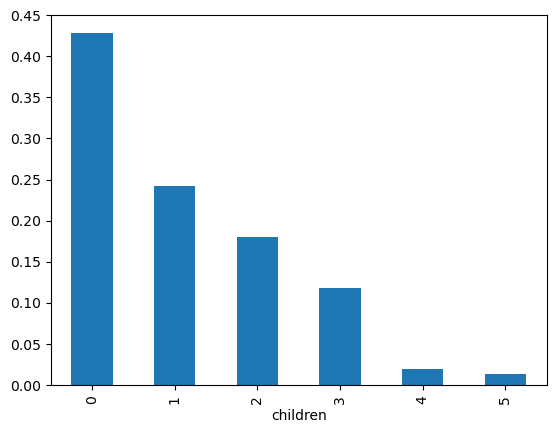

In [66]:
# Diagramme en secteurs
df["children"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
df["children"].value_counts(normalize=True).plot(kind='bar')
plt.show()

### Graphique des données pour la variable IMC

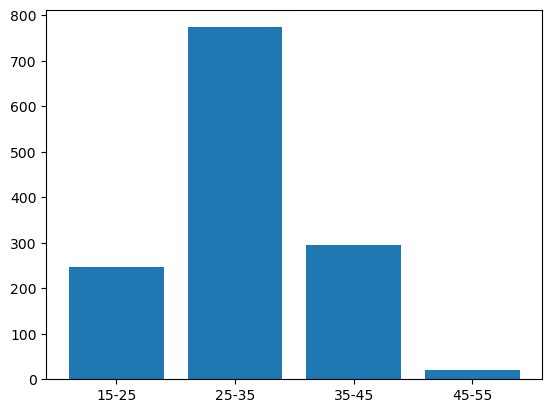

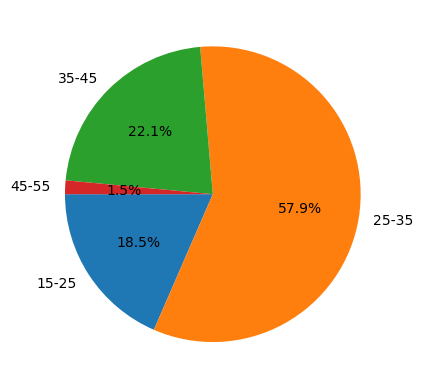

In [67]:
# Diagramme en barres
sections = [15, 25, 35, 45, 55]
df['sections'] = pd.cut(df['bmi'], bins=sections, labels=['15-25', '25-35', '35-45' , '45-55'])
grouped_data = df.groupby('sections').size().reset_index(name='count')
plt.bar(grouped_data['sections'], grouped_data['count'])
plt.show() # Affiche le graphique

# Diagramme en camembert
plt.pie(grouped_data['count'], labels=grouped_data['sections'], autopct='%1.1f%%', startangle=180)
plt.show()

### Graphique des données pour la variable Charges

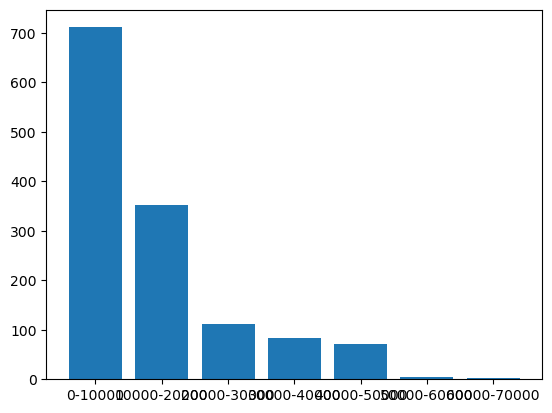

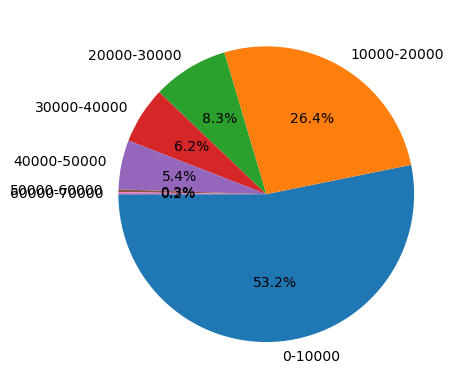

In [68]:
# Diagramme en barres
sections = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000]
df['sections'] = pd.cut(df['charges'], bins=sections, labels=['0-10000', '10000-20000', '20000-30000' , '30000-40000' , '40000-50000' , '50000-60000' , '60000-70000'])
grouped_data = df.groupby('sections').size().reset_index(name='count')
plt.bar(grouped_data['sections'], grouped_data['count'])
plt.show() # Affiche le graphique

# Diagramme en camembert
plt.pie(grouped_data['count'], labels=grouped_data['sections'], autopct='%1.1f%%', startangle=180)
plt.show()

## Matrice de corrélation 

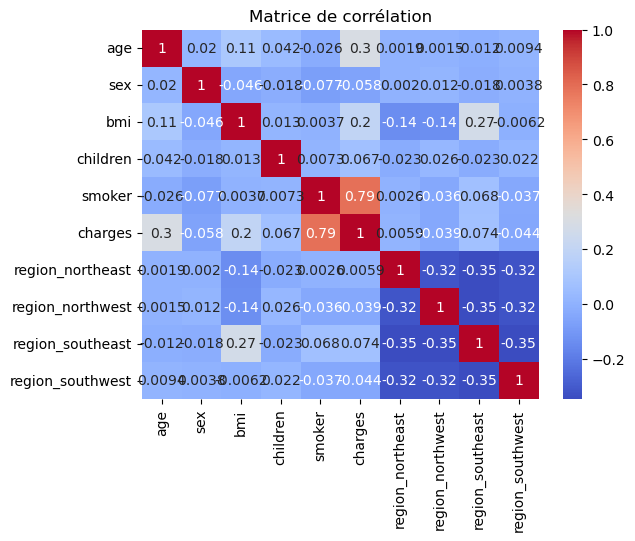

In [74]:
corr_matrix = df.corr(method="pearson")
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

# Analyses bivariées

### Analyse corrélation de la variable sexe avec les charges

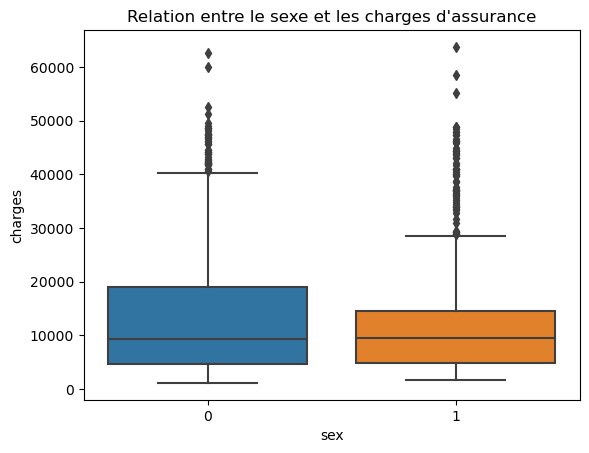

In [72]:
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Relation entre le sexe et les charges d\'assurance')
plt.show()

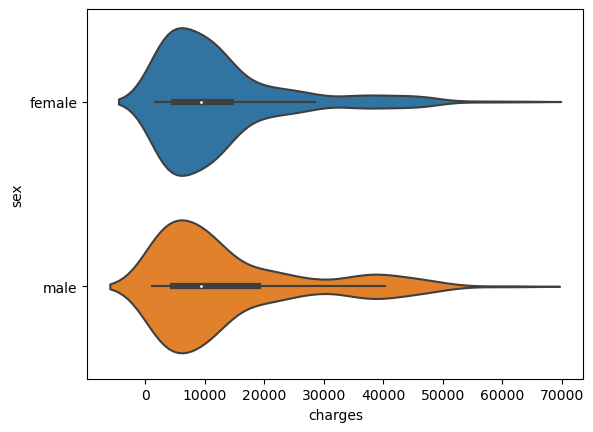

In [60]:

# Tracer un diagramme de dispersion avec ajustement linéaire
sns.violinplot(x=df['charges'], y=df['sex'], data=df)
plt.show()

### Analyse corrélation de la variable children avec les charges

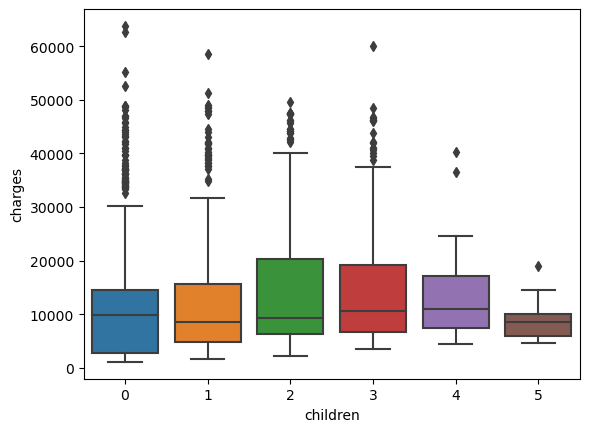

In [55]:

# Tracer un diagramme de dispersion avec ajustement linéaire
sns.boxplot(x=df['children'], y=df['charges'], data=df)
plt.show()

### Analyse corrélation de la variable smoker avec les charges

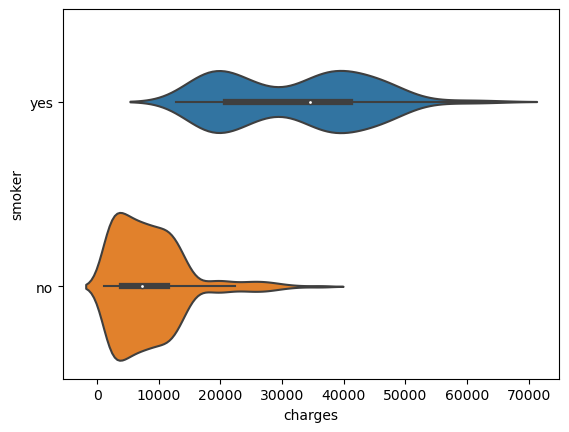

In [53]:

# Tracer un diagramme de dispersion avec ajustement linéaire
sns.violinplot(x=df['charges'], y=df['smoker'], data=df)
plt.show()

### Analyse de corrélation entre l'âge et le nombre d'enfants

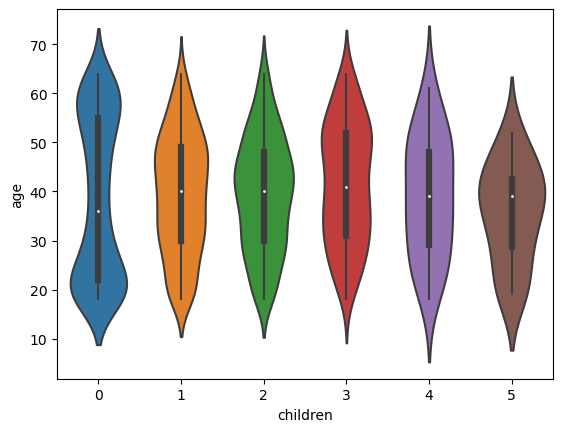

In [81]:
sns.violinplot(x=df['children'], y=df['age'], data=df)
plt.show()

### Analyse de corrélation entre l'IMC et les fumeurs

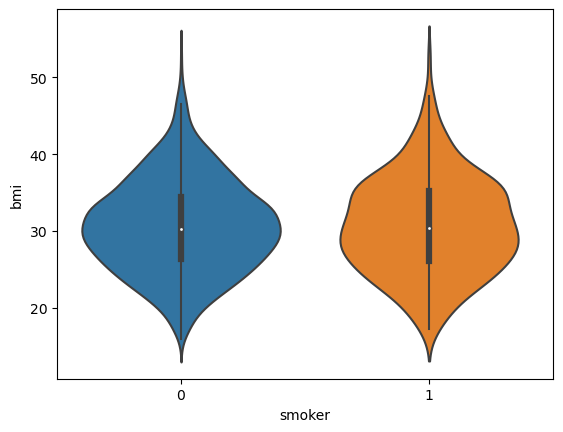

In [84]:
sns.violinplot(x=df['smoker'], y=df['bmi'], data=df)
plt.show()